In [114]:
from tensorflow.keras.models import load_model
model = load_model('best_model_3.h5')

In [115]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
def display(img_):
    img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    plt.subplot(111)
    plt.imshow(img)
    #plt.axis('off')
    plt.show

In [116]:
# Find characters in the resulting images
def segment_characters(img) :

    # Preprocess cropped license plate image
    img_lp = cv2.resize(img, (275,184))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

   # LP_HEIGHT = img_binary_lp.shape[0]
   # LP_WIDTH = img_binary_lp.shape[1]

    # Make borders white
    img_binary_lp[:5 :] = 255
    img_binary_lp[-5:, :] = 255
    img_binary_lp[:, :5] = 255
    img_binary_lp[:, -5:] = 255

    # Estimations of character contours sizes of cropped license plates
    dimensions = [20,
                       92,
                       27.5,
                       183.3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.show()
    cv2.imwrite('contour.jpg',img_binary_lp)

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_binary_lp)

    return char_list
def find_contours(dimensions, img) :

    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    
    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:13]
    
    ii = cv2.imread('contour.jpg')
    
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        # detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        # checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            # extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')
            center_y = intY + intHeight // 2
            char = cv2.subtract(255, char)
            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append((center_y, intX, char_copy)) # List that stores the character's binary image (unsorted)
          
            # Make result formatted for classification: invert colors
           
            
    # Return characters on ascending order with respect to the x-coordinate (most-left character first)
            
    plt.show()
    # arbitrary function that stores sorted list of character indeces
    img_res = sorted(img_res, key=lambda x: (x[0] > 92, x[0] < 92, x[1]))
    img_res = [char[2] for char in img_res]
    img_res = np.array(img_res)

    return img_res

In [117]:
def fix_dimension(image): 
    img = np.zeros((28, 28, 3))
    for i in range(3):
        img[:,:,i] = image
    return img
def show_results(char):
    dic = {}
    characters = '0123456789ABCDEFGHKLMNPSTUVXYZ'
    for i,c in enumerate(characters):
        dic[i] = c

    output = []
    for i, ch in enumerate(char):
        image_ = cv2.resize(ch, (28, 28), interpolation=cv2.INTER_AREA)
        image = fix_dimension(image_)
        image = image.reshape(1, 28, 28, 3)
        predictions = model.predict(image)
        y_ = np.argmax(predictions[0])
        characters = dic[y_]
        output.append(characters)
        
    plate_number = ''.join(output)
    return plate_number

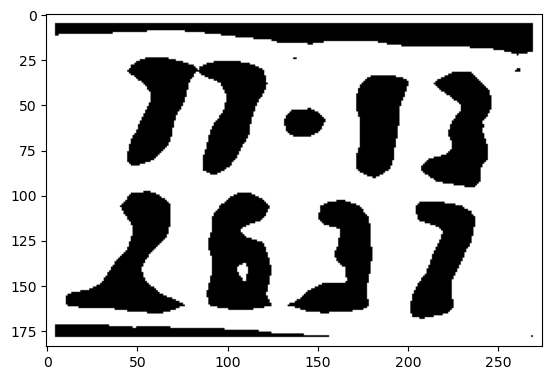

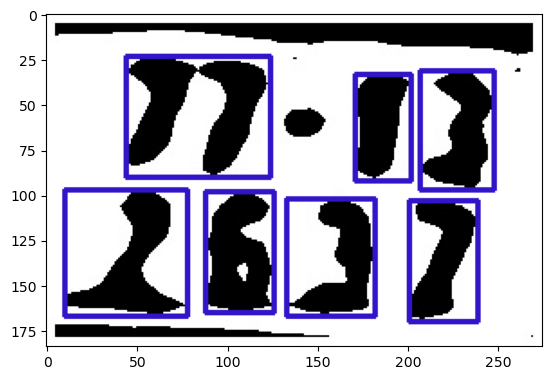

1/1 [==============================] - 0s 83ms/step


'7F116D7'

In [118]:
img = cv2.imread('bienso/z5222656236509_a3b4ff1cab7e8c92e6add9abfaf8189a.jpg')
char = segment_characters(img)
plate_number = show_results(char)
plate_number

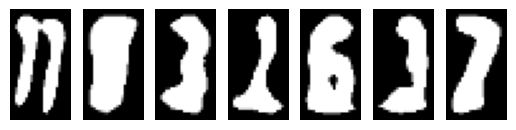

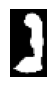

In [113]:
#1 i j o q r w
for i in range(len(char)):
    plt.subplot(1, len(char), i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')
    
image = char[5]
fig, ax = plt.subplots(figsize=(image.shape[1]/50, image.shape[0]/50)) 
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


In [90]:
import os
import shutil
import random
from math import ceil

data_path = "archive/data/datatonghop0"

train_path = os.path.join(data_path, "train")
#val_path = os.path.join(data_path, "val")

#if not os.path.exists(val_path):
    #os.makedirs(val_path)


class_folders = os.listdir(train_path)

for class_folder in class_folders:
    class_path = os.path.join(train_path, class_folder)
    
    if os.path.isdir(class_path):
        num_files = len(os.listdir(class_path))
        print(f" {class_folder}: {num_files}")


 class_0: 98
 class_1: 42
 class_2: 99
 class_3: 53
 class_4: 45
 class_5: 103
 class_6: 86
 class_7: 59
 class_8: 83
 class_9: 72
 class_A: 49
 class_B: 86
 class_C: 67
 class_D: 68
 class_E: 78
 class_F: 42
 class_G: 52
 class_H: 91
 class_K: 44
 class_L: 33
 class_M: 45
 class_N: 55
 class_P: 91
 class_S: 45
 class_T: 35
 class_U: 64
 class_V: 42
 class_X: 64
 class_Y: 49
 class_Z: 54


In [91]:
import os
import shutil
import random
from math import ceil

data_path = "archive/data/datatonghop4"

train_path = os.path.join(data_path, "train")
val_path = os.path.join(data_path, "val")

if not os.path.exists(val_path):
    os.makedirs(val_path)


class_folders = os.listdir(train_path)

for class_folder in class_folders:
    class_path = os.path.join(train_path, class_folder)
    
    if os.path.isdir(class_path):
        num_files = len(os.listdir(class_path))
        print(f" {class_folder}: {num_files}")

print("done")



 class_0: 98
 class_1: 42
 class_2: 99
 class_3: 53
 class_4: 45
 class_5: 103
 class_6: 86
 class_7: 59
 class_8: 83
 class_9: 72
 class_A: 49
 class_B: 86
 class_C: 67
 class_D: 68
 class_E: 78
 class_F: 42
 class_G: 52
 class_H: 91
 class_K: 44
 class_L: 33
 class_M: 45
 class_N: 55
 class_P: 91
 class_S: 45
 class_T: 35
 class_U: 64
 class_V: 42
 class_X: 64
 class_Y: 49
 class_Z: 54
done


In [92]:
import pygame
import time
pygame.init()
pygame.mixer.init()

def done():
    try:
        sound_file_path = "tieng-chuong-thong-bao-dong-ho-casio-keu-1-lan-www_tiengdong_com.mp3"  # Replace with the actual path to your sound file

        for _ in range(3):  # Play the sound 10 times
            sound = pygame.mixer.Sound(sound_file_path)
            sound.play()
            # Wait for the sound to complete before playing it again
            time.sleep(sound.get_length())

    except pygame.error as e:
        print(f"Error playing sound: {e}")
    finally:
        # Quit pygame and mixer
        pygame.mixer.quit()
        pygame.quit()


In [93]:
done()

In [94]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from os.path import join
import cv2

# Định nghĩa các tham số augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.01,
    height_shift_range=0.01
    # Thêm các tham số khác tùy ý
)

input_folder = "archive/data/datatonghop4/train"
for class_folder in os.listdir(input_folder):
    class_path = join(input_folder, class_folder)
    for filename in os.listdir(class_path):
        img_path = join(class_path, filename)

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

        img = img.reshape((1,) + img.shape)

        aug_generator = datagen.flow(img, batch_size=1,
                                     save_to_dir=class_path,
                                     save_prefix='aug_', save_format='jpeg')

        for _ in range(1): 
            aug_img = aug_generator.next()[0]

done


In [95]:
for class_folder in class_folders:
    class_train_path = os.path.join(train_path, class_folder)
    
    class_val_path = os.path.join(val_path, class_folder)
    
    if not os.path.exists(class_val_path):
        os.makedirs(class_val_path)
    
    images = os.listdir(class_train_path)
    
    num_val_images = ceil(0.4 * len(images))
    
    val_images = random.sample(images, num_val_images)
    
    for val_image in val_images:
        src_path = os.path.join(class_train_path, val_image)
        dest_path = os.path.join(class_val_path, val_image)
        shutil.move(src_path, dest_path)

print("done")

done


In [101]:
val_path = os.path.join(data_path, "train")
class_val_folders = os.listdir(val_path)
for class_val_folder in class_val_folders:
    class_val_path = os.path.join(val_path, class_val_folder)
    
    if os.path.isdir(class_val_path):
        num_files = len(os.listdir(class_val_path))
        print(f" {class_val_folder}: {num_files}")


 class_0: 117
 class_1: 49
 class_2: 118
 class_3: 63
 class_4: 54
 class_5: 123
 class_6: 103
 class_7: 70
 class_8: 99
 class_9: 85
 class_A: 58
 class_B: 102
 class_C: 80
 class_D: 81
 class_E: 93
 class_F: 50
 class_G: 62
 class_H: 109
 class_K: 52
 class_L: 39
 class_M: 54
 class_N: 66
 class_P: 108
 class_S: 54
 class_T: 42
 class_U: 76
 class_V: 50
 class_X: 76
 class_Y: 58
 class_Z: 64


In [99]:
from PIL import Image

def resize_images(input_path, new_size):
    class_folders = os.listdir(input_path)

    for class_folder in class_folders:
        class_train_path = os.path.join(input_path, class_folder)

        images = os.listdir(class_train_path)

        for image_file in images:
            image_path = os.path.join(class_train_path, image_file)

            # Load image
            image = Image.open(image_path)

            # Resize image
            resized_image = image.resize(new_size)

            # Save resized image back to the original location, overwriting the original image
            resized_image.save(image_path)

data_path = "archive/data/datatonghop4"
train_path = os.path.join(data_path, "train")
val_path = os.path.join(data_path, "val")

# Resize training images
resize_images(train_path, (28, 28))

# Resize validation images
resize_images(val_path, (28, 28))

print("done")

done
